# Tapşırıq 17.

## Bizim 24 saat açıq filiallarımızda gecə kifayət qədər satış yoxdursa gecə növbəsin ləğv edək. Zəhmət olmasa, ümumilikdə il ərzində gecə 23:00-dan səhər 06:00 -a qədər hansı marketimizdə neçə manatlıq satış olduğunu bizə qrafik şəklində göstərin. Yaxşı olardı ki, qrafikdə mağazalar satış nəticələrinə görə üç kateqoriyaya : yaxşı, orta, pis olaraq bölünsün.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("esas_mehsullar.csv")
df = data.copy()
df.head()

,column_a,satish_kodu,mehsul_kodu,mehsul_ad,mehsul_kateqoriya,mehsul_qiymet,satish_tarixi,endirim_kompaniya,bonus_kart,magaza_ad,magaza_lat,magaza_long,magaza_location
0,0,577571,3334,GONDOL SIMPLE LABABO VE BUZLUK HALISI G61*50,Məişət məhsulları,3.68,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
1,1,577571,4674,TAXTA BICAQ 3232,Qab-qacaq,2.25,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
2,2,577571,8388,VITA 1LT ANANAS SIRESI,Meyvə Şirələri,2.50,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
3,3,577571,6017,GILAN BAGDAN 1LT SARI GAVALI KOMPOTU,Kompotlar,1.45,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
4,4,577571,8297,OSRAM SUPERSTAR LAMPA 64544A ECO 57W E27,Məişət məhsulları,2.92,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)


In [3]:
# çatışmayan verilənləri silmək

df.dropna(subset=["mehsul_qiymet", "mehsul_ad"],inplace = True)

In [4]:
# satish_tarixi sütununu tarix tipli dəyişənə çevirmək

df["satish_tarixi"] = df["satish_tarixi"].transform(lambda x: x.replace("T", " ")).astype("datetime64")

In [5]:
# tarixləri index olaraq qeyd etmək

df.set_index("satish_tarixi", drop = True, inplace = True)

In [6]:
df

,column_a,satish_kodu,mehsul_kodu,mehsul_ad,mehsul_kateqoriya,mehsul_qiymet,endirim_kompaniya,bonus_kart,magaza_ad,magaza_lat,magaza_long,magaza_location
satish_tarixi,,,,,,,,,,,,
2019-07-19 12:29:00,0,577571,3334,GONDOL SIMPLE LABABO VE BUZLUK HALISI G61*50,Məişət məhsulları,3.68,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
2019-07-19 12:29:00,1,577571,4674,TAXTA BICAQ 3232,Qab-qacaq,2.25,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
2019-07-19 12:29:00,2,577571,8388,VITA 1LT ANANAS SIRESI,Meyvə Şirələri,2.50,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
2019-07-19 12:29:00,3,577571,6017,GILAN BAGDAN 1LT SARI GAVALI KOMPOTU,Kompotlar,1.45,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
2019-07-19 12:29:00,4,577571,8297,OSRAM SUPERSTAR LAMPA 64544A ECO 57W E27,Məişət məhsulları,2.92,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-15 11:39:00,438821,497589,6549,ADONIS BAYAN BADY KOD:80070,Tekstil,8.90,Payız endirimləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
2019-03-01 23:13:00,438822,458448,6645,SIGARET SOBRANIE KS SLIMS BLACKS,Tütün məhsulları,3.60,Bərəkətli Novruz,False,Xalqlar dostluğu,40.394605,49.953685,POINT(49.953685 40.394605)
2019-03-01 23:13:00,438823,458448,4171,TACH BULASIK SUNGERI 10-LU,"Yuyucu, təmizləyicilər",1.90,Bərəkətli Novruz,False,Xalqlar dostluğu,40.394605,49.953685,POINT(49.953685 40.394605)


In [7]:
# saat aralığına aid olan datanı seçmək

gece = df.between_time("23:00", "06:00")

In [8]:
gece

,column_a,satish_kodu,mehsul_kodu,mehsul_ad,mehsul_kateqoriya,mehsul_qiymet,endirim_kompaniya,bonus_kart,magaza_ad,magaza_lat,magaza_long,magaza_location
satish_tarixi,,,,,,,,,,,,
2019-04-29 03:20:00,8,583812,6131,LUCK SIAM 565GR ANANAS DILIMLERI SIROPDA D/Q,Meyvə Şirələri,3.05,NaN,True,Həzi Aslanov-1,40.370900,49.956770,POINT(49.95677 40.3709)
2019-04-29 03:20:00,9,583812,3545,"SOKOLAD ULDUZ FAVO SOKOLAD,PORTAGAL KG",Şirniyyat,11.80,NaN,True,Həzi Aslanov-1,40.370900,49.956770,POINT(49.95677 40.3709)
2019-04-29 03:20:00,10,583812,2957,MARANDI 750ML YANARDAG QIRMIZI KEMSIRIN SERAB S/Q,Şərablar,5.10,NaN,True,Həzi Aslanov-1,40.370900,49.956770,POINT(49.95677 40.3709)
2019-09-13 02:31:00,30,644844,2780,MACCOFFEE 24GR KOFE 3V1 CAFE PHO,"Kofe, kakao və s.",0.45,Payız endirimləri,True,20 yanvar,40.395360,49.818190,POINT(49.81819 40.39536)
2019-09-13 02:31:00,31,644844,6230,XORTICYA 1LT ARAQ ABSOLUTNAYA GOLD S/Q,Araq,20.00,Payız endirimləri,True,20 yanvar,40.395360,49.818190,POINT(49.81819 40.39536)
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-15 23:17:00,438787,375229,8194,YASRIB 500GR CAY EARL GREY,Çay,14.65,Sərin Yay günləri,False,Xalqlar dostluğu,40.394605,49.953685,POINT(49.953685 40.394605)
2019-03-01 23:13:00,438822,458448,6645,SIGARET SOBRANIE KS SLIMS BLACKS,Tütün məhsulları,3.60,Bərəkətli Novruz,False,Xalqlar dostluğu,40.394605,49.953685,POINT(49.953685 40.394605)
2019-03-01 23:13:00,438823,458448,4171,TACH BULASIK SUNGERI 10-LU,"Yuyucu, təmizləyicilər",1.90,Bərəkətli Novruz,False,Xalqlar dostluğu,40.394605,49.953685,POINT(49.953685 40.394605)


In [9]:
# mağazalar üzrə gecə növbəsi satışları

satislar = gece.groupby("magaza_ad")["mehsul_qiymet"].sum().to_frame().reset_index()

In [10]:
satislar.rename(columns={"mehsul_qiymet" : "umumi_satis"}, inplace=True)
satislar.sort_values(by = "umumi_satis", inplace = True)
satislar

,magaza_ad,umumi_satis
10,Maşın bazarı,33380.48
2,8 mkr,33396.37
0,20 yanvar,33582.11
13,Radiozavod,33854.13
19,Zabrat,34515.06
20,Əhmədli,35018.26
6,Hipermarket,35193.67
14,Xalqlar dostluğu,35393.92
9,M. Əcəmi,35524.28
7,Həzi Aslanov-1,35593.42


In [11]:
# keyfiyyətə görə bölmək

labels = ["Pis","Orta","Yaxşı"]
satislar["keyfiyyet"] = pd.qcut(satislar["umumi_satis"],3,labels = labels)

In [12]:
satislar

,magaza_ad,umumi_satis,keyfiyyet
10,Maşın bazarı,33380.48,Pis
2,8 mkr,33396.37,Pis
0,20 yanvar,33582.11,Pis
13,Radiozavod,33854.13,Pis
19,Zabrat,34515.06,Pis
20,Əhmədli,35018.26,Pis
6,Hipermarket,35193.67,Pis
14,Xalqlar dostluğu,35393.92,Orta
9,M. Əcəmi,35524.28,Orta
7,Həzi Aslanov-1,35593.42,Orta


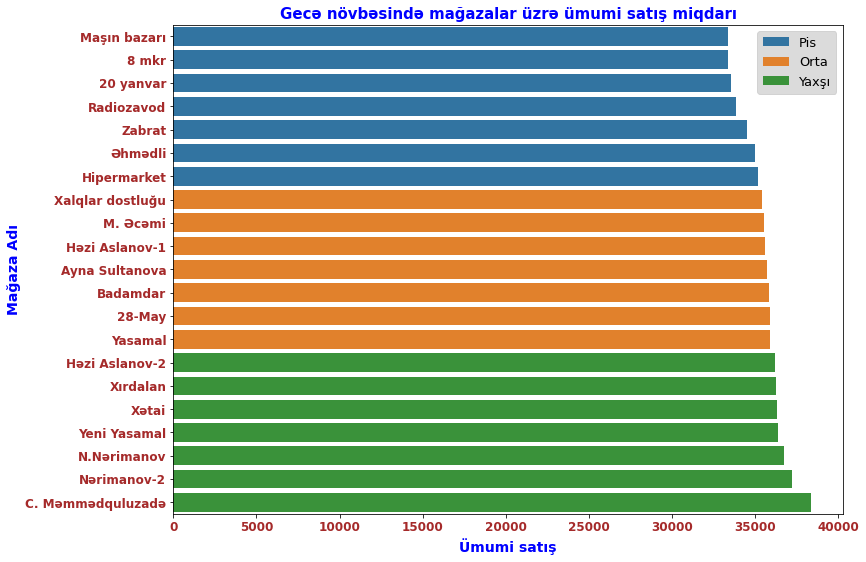

In [14]:
# qrafik


plt.figure(figsize = (12,9))
ax = sns.barplot(x = "umumi_satis", y = "magaza_ad", hue = "keyfiyyet", data = satislar, dodge=False);

plt.title("Gecə növbəsində mağazalar üzrə ümumi satış miqdarı", fontsize = 15, fontweight = "bold", color = "b")

ax.set_ylabel("Mağaza Adı", fontsize = 14, fontweight = "bold", color = "b");
plt.yticks(fontsize = 12, fontweight = "bold", color = "brown");

ax.set_xlabel("Ümumi satış", fontsize = 14, fontweight = "bold", color = "b");
plt.xticks(fontsize = 12, fontweight = "bold", color = "brown");

plt.legend(fontsize = 13, facecolor = "lightgrey");

plt.savefig("qrafik.png", dpi = 100, bbox_inches = "tight")